In [19]:
teamname = "qcc_ducklings"
task = "part 1"
teammates = ["Jesús Fabián Macías Amador","Sebastián Domínguez","Fabián Hernández","Jesús Guzmán"]

In [2]:
import numpy as np
import json
import os
import qiskit
from collections import Counter
import matplotlib.pyplot as plt

In [3]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_bloch_multivector, plot_histogram, plot_bloch_vector, array_to_latex, plot_state_qsphere
from math import pi, sqrt

In [4]:
sim = Aer.get_backend('aer_simulator') 

In [14]:
#load the actual hackthon data (fashion-mnist)
images=np.load('data/images.npy')*255
labels=np.load('data/labels.npy')

In [15]:
def normalize_image(image):
    sum_sq = 0
    for row in image:
        for pixel in row:
            sum_sq += pixel ** 2
            
    return image / np.sqrt(sum_sq)
    
def encoder(image):
    image = normalize_image(image)
    n = 10
    qc = QuantumCircuit(n)
    
    for i in range(n):
        qc.h(i)
    
    # 10 qubits, cada uno tiene 2 estados == 1024 estados a disposicion
    size = len(image)
    initial_state = np.zeros(2**n)
    counter = 0
    
    for i in range(size):
        for j in range(size):
            initial_state[counter] = image[i][j]
            counter += 1
            
    qc.initialize(initial_state)
    qc.save_statevector()
       
    return qc

def decoder(counts):
    size = 28
    reconstruction = np.zeros([size, size])

    binaries = list(counts.keys())
    decimals = list(map(lambda b: int(b, 2), binaries))

    for b in list(counts.keys()):
        d = int(b, 2)
        i = int(np.floor(d / 28))
        j = int(d % 28)
        reconstruction[i][j] = counts[b]
        
    return reconstruction

In [16]:
def run_part1(image):
    # encode the images
    qc = encoder(image)
    
    qobj = assemble(qc)
    #simulate the quantum circuit
    result = sim.run(qobj).result()

    counts = result.get_counts()
    new_image = decoder(counts)
    return qc,new_image

In [17]:
qc,im = run_part1(images[1001])

1024


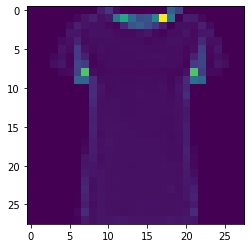

In [18]:
plt.imshow(im)